In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import subprocess as sp

In [3]:
corona_df = pd.read_csv("3rd/covid19.csv")

In [4]:
corona_df.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Afghanistan,AF,NaN,NaN,NaN,33.94,67.71,0,0,0,0,2020-01-22 00:00:00+00:00
1,Afghanistan,AF,NaN,NaN,NaN,33.94,67.71,0,0,0,0,2020-01-23 00:00:00+00:00
2,Afghanistan,AF,NaN,NaN,NaN,33.94,67.71,0,0,0,0,2020-01-24 00:00:00+00:00
3,Afghanistan,AF,NaN,NaN,NaN,33.94,67.71,0,0,0,0,2020-01-25 00:00:00+00:00
4,Afghanistan,AF,NaN,NaN,NaN,33.94,67.71,0,0,0,0,2020-01-26 00:00:00+00:00


In [5]:
corona_df.drop(['Province', 'City', 'CityCode', 'Lat', 'Lon', 'CountryCode'], axis=1, inplace=True)
corona_df['Date'] =  pd.to_datetime(corona_df['Date'])
corona_df.Date = corona_df.Date.dt.date
corona_df['Date'] =  pd.to_datetime(corona_df['Date'])
corona_df.head()

,Country,Confirmed,Deaths,Recovered,Active,Date
0,Afghanistan,0,0,0,0,2020-01-22
1,Afghanistan,0,0,0,0,2020-01-23
2,Afghanistan,0,0,0,0,2020-01-24
3,Afghanistan,0,0,0,0,2020-01-25
4,Afghanistan,0,0,0,0,2020-01-26


In [6]:
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319683 entries, 0 to 319682
Data columns (total 6 columns):
Country      319683 non-null object
Confirmed    319683 non-null int64
Deaths       319683 non-null int64
Recovered    319683 non-null int64
Active       319683 non-null int64
Date         319683 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 14.6+ MB


In [7]:
# Some countries, such as China, are split into different provinces/states. 
# Since we just want the total number of cases per country, we get the sum for each country at each date:
sum_df = corona_df.groupby(['Country', 'Date'], as_index=False).sum()

In [8]:
sum_df.head()

,Country,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2020-01-22,0,0,0,0
1,Afghanistan,2020-01-23,0,0,0,0
2,Afghanistan,2020-01-24,0,0,0,0
3,Afghanistan,2020-01-25,0,0,0,0
4,Afghanistan,2020-01-26,0,0,0,0


In [9]:
sum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16653 entries, 0 to 16652
Data columns (total 6 columns):
Country      16653 non-null object
Date         16653 non-null datetime64[ns]
Confirmed    16653 non-null int64
Deaths       16653 non-null int64
Recovered    16653 non-null int64
Active       16653 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 910.7+ KB


In [10]:
date_list = pd.DataFrame(sum_df.Date.unique())
date_list.rename(columns = {0:'Date'}, inplace = True)
date_list.to_csv('date_list.csv', encoding='utf-8', index=False)

In [11]:
countries = gpd.read_file('Countries_WGS84/Countries_WGS84.shp')

In [12]:
countries.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [13]:
countries.drop('OBJECTID', axis=1, inplace=True)
countries.rename(columns = {'CNTRY_NAME':'Country'},
               inplace = True)

In [14]:
countries.head()

,Country,geometry
0,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [15]:
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
Country     251 non-null object
geometry    251 non-null geometry
dtypes: geometry(1), object(1)
memory usage: 4.0+ KB


In [16]:
# we need to make sure that the country names match between the data and the shapefiles


sum_df = sum_df.replace({'Country' : 'Bahamas'}, 'Bahamas, The')
sum_df = sum_df.replace({'Country' : 'Belarus'}, 'Byelarus')
sum_df = sum_df.replace({'Country' : 'Brunei Darussalam'}, 'Brunei')
sum_df = sum_df.replace({'Country' : 'Congo (Kinshasa)'}, 'Congo')
sum_df = sum_df.replace({'Country' : 'Gambia'}, 'Gambia, The')
sum_df = sum_df.replace({'Country' : 'Iran, Islamic Republic of'}, 'Iran')
sum_df = sum_df.replace({'Country' : 'Korea (South)'}, 'South Korea')
sum_df = sum_df.replace({'Country' : 'Lao PDR'}, 'Laos')
sum_df = sum_df.replace({'Country' : 'Macedonia, Republic of'}, 'Macedonia')
sum_df = sum_df.replace({'Country' : 'Myanmar'}, 'Myanmar (Burma)')
sum_df = sum_df.replace({'Country' : 'Russian Federation'}, 'Russia')
sum_df = sum_df.replace({'Country' : 'Saint Kitts and Nevis'}, 'St. Kitts and Nevis')
sum_df = sum_df.replace({'Country' : 'Saint Lucia'}, 'St. Lucia')
sum_df = sum_df.replace({'Country' : 'Saint Vincent and Grenadines'}, 'St. Vincent and Grenadines')
sum_df = sum_df.replace({'Country' : 'Syrian Arab Republic (Syria)'}, 'Syria')
sum_df = sum_df.replace({'Country' : 'Taiwan, Republic of China'}, 'Taiwan')
sum_df = sum_df.replace({'Country' : 'United States of America'}, 'United States')
sum_df = sum_df.replace({'Country' : 'Venexuela (Bolivarian Republic)'}, 'Venezuela')
sum_df = sum_df.replace({'Country' : 'Viet Nam'}, 'Vietnam')

In [17]:
country_list = pd.DataFrame(countries.Country.unique())
country_list.rename(columns = {0:'Country'}, inplace = True) 
country_list.to_csv('country_list.csv', encoding='utf-8', index=False)

In [18]:
def cartesian_product_simplified(left, right):
    la, lb = len(left), len(right)
    ia2, ib2 = np.broadcast_arrays(*np.ogrid[:la,:lb])

    return pd.DataFrame(
        np.column_stack([left.values[ia2.ravel()], right.values[ib2.ravel()]]))

In [19]:
test = cartesian_product_simplified(country_list, date_list)

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22841 entries, 0 to 22840
Data columns (total 2 columns):
0    22841 non-null object
1    22841 non-null object
dtypes: object(2)
memory usage: 357.0+ KB


In [21]:
test.rename(columns = {0:'Country', 1:'Date'},
                          inplace = True)  

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22841 entries, 0 to 22840
Data columns (total 2 columns):
Country    22841 non-null object
Date       22841 non-null object
dtypes: object(2)
memory usage: 357.0+ KB


In [23]:
test['Date'] = pd.to_datetime(test['Date'])

In [24]:
test.head()

,Country,Date
0,Aruba,2020-01-22
1,Aruba,2020-01-23
2,Aruba,2020-01-24
3,Aruba,2020-01-25
4,Aruba,2020-01-26


In [25]:
test.to_csv('country_date_list.csv', encoding='utf-8', index=False)

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22841 entries, 0 to 22840
Data columns (total 2 columns):
Country    22841 non-null object
Date       22841 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 357.0+ KB


In [27]:
merged = pd.merge(test, sum_df, how='left', left_on=['Country', 'Date'], right_on=['Country', 'Date'])

In [28]:
merged.head()

,Country,Date,Confirmed,Deaths,Recovered,Active
0,Aruba,2020-01-22,NaN,NaN,NaN,NaN
1,Aruba,2020-01-23,NaN,NaN,NaN,NaN
2,Aruba,2020-01-24,NaN,NaN,NaN,NaN
3,Aruba,2020-01-25,NaN,NaN,NaN,NaN
4,Aruba,2020-01-26,NaN,NaN,NaN,NaN


In [29]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22841 entries, 0 to 22840
Data columns (total 6 columns):
Country      22841 non-null object
Date         22841 non-null datetime64[ns]
Confirmed    15834 non-null float64
Deaths       15834 non-null float64
Recovered    15834 non-null float64
Active       15834 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.2+ MB


In [30]:
print(merged.Country.isnull().values.sum())
print(merged.Date.isnull().values.sum())
print(merged.Confirmed.isnull().values.sum())
print(merged.Deaths.isnull().values.sum())
print(merged.Recovered.isnull().values.sum())
print(merged.Active.isnull().values.sum())

0
0
7007
7007
7007
7007


In [31]:
merged['Confirmed'] = merged['Confirmed'].fillna(0)
merged['Deaths'] = merged['Deaths'].fillna(0)
merged['Recovered'] = merged['Recovered'].fillna(0)
merged['Active'] = merged['Active'].fillna(0)

In [32]:
print(merged.Country.isnull().values.sum())
print(merged.Date.isnull().values.sum())
print(merged.Confirmed.isnull().values.sum())
print(merged.Deaths.isnull().values.sum())
print(merged.Recovered.isnull().values.sum())
print(merged.Active.isnull().values.sum())

0
0
0
0
0
0


In [33]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22841 entries, 0 to 22840
Data columns (total 6 columns):
Country      22841 non-null object
Date         22841 non-null datetime64[ns]
Confirmed    22841 non-null float64
Deaths       22841 non-null float64
Recovered    22841 non-null float64
Active       22841 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.2+ MB


In [34]:
final = pd.merge(merged, countries, on='Country')

In [35]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22841 entries, 0 to 22840
Data columns (total 7 columns):
Country      22841 non-null object
Date         22841 non-null datetime64[ns]
Confirmed    22841 non-null float64
Deaths       22841 non-null float64
Recovered    22841 non-null float64
Active       22841 non-null float64
geometry     22841 non-null geometry
dtypes: datetime64[ns](1), float64(4), geometry(1), object(1)
memory usage: 1.4+ MB


In [36]:
final.head()

,Country,Date,Confirmed,Deaths,Recovered,Active,geometry
0,Aruba,2020-01-22,0.0,0.0,0.0,0.0,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Aruba,2020-01-23,0.0,0.0,0.0,0.0,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
2,Aruba,2020-01-24,0.0,0.0,0.0,0.0,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
3,Aruba,2020-01-25,0.0,0.0,0.0,0.0,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
4,Aruba,2020-01-26,0.0,0.0,0.0,0.0,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."


In [37]:
test_gpd = final

In [38]:
achha_ji = final

In [39]:
geometry = test_gpd.geometry
crs = {'init': 'epsg:4326'}
test_gpd = gpd.GeoDataFrame(test_gpd, crs=crs, geometry=geometry)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [40]:
test_gpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 22841 entries, 0 to 22840
Data columns (total 7 columns):
Country      22841 non-null object
Date         22841 non-null datetime64[ns]
Confirmed    22841 non-null float64
Deaths       22841 non-null float64
Recovered    22841 non-null float64
Active       22841 non-null float64
geometry     22841 non-null geometry
dtypes: datetime64[ns](1), float64(4), geometry(1), object(1)
memory usage: 1.4+ MB


In [41]:
geometry = final.geometry
crs = {'init': 'epsg:4326'}
final_gpd = gpd.GeoDataFrame(final, crs=crs, geometry=geometry)

In [42]:
achha_ji = achha_ji.astype(object)

In [87]:
achha_ji.to_csv('master_dataset.csv', encoding='utf-8', index=False)

NameError: name 'date_list_test' is not defined

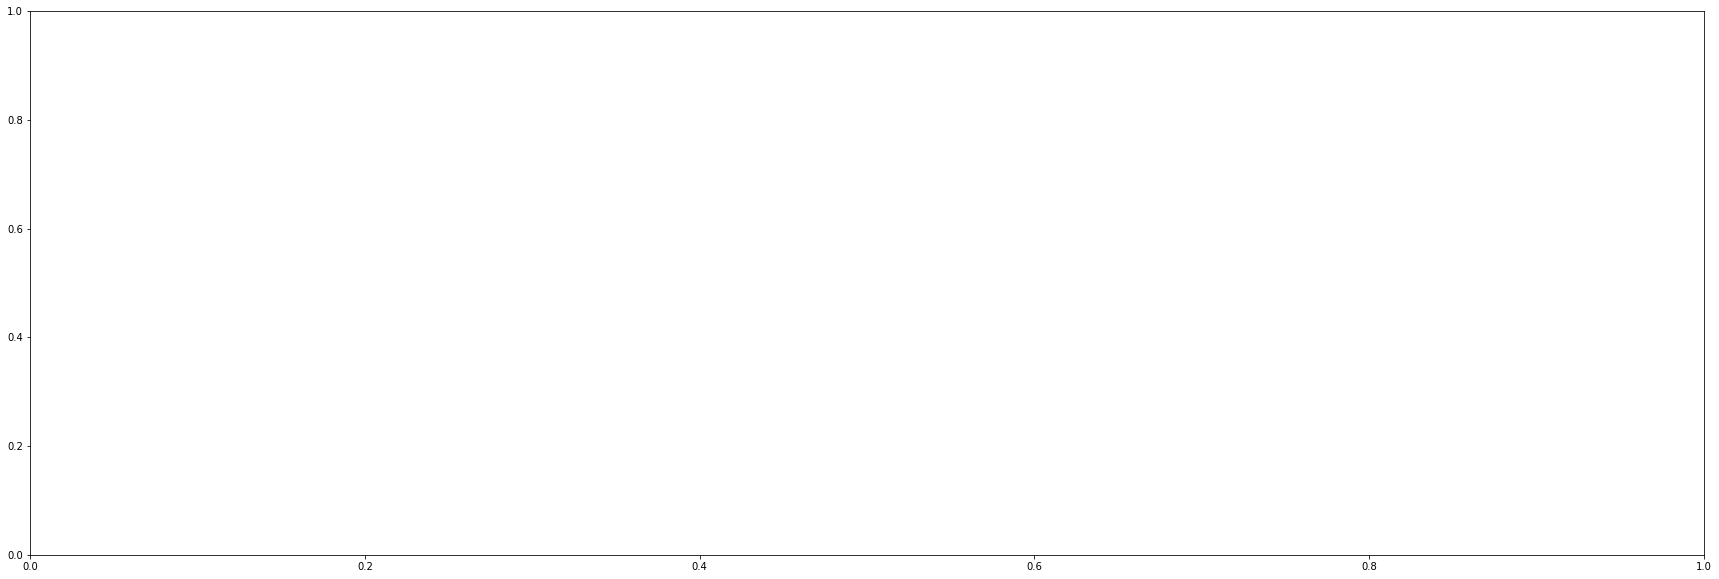

In [43]:
fig, ax = plt.subplots(1, figsize=(30, 10))
variable = 'Confirmed'
# set the range for the choropleth values
vmin, vmax = 0, final_gpd.Confirmed[final_gpd.Date == '2020-04-21'].max()
for i in range(0, len(date_list_test)):   
    date_for_mask = date_list_test[0][i]
    mask = (final_gpd['Date'] == date_for_mask)
    my_map = final_gpd.loc[mask]
    ax.axis('off')
    ax.set_title(str(date_for_mask))
    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    fig.colorbar(sm)
    final_gpd.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
    fig.savefig('output_images/image_{number:04d}.png'.format(number=number), 
                dpi=300, bbox_inches='tight')
#     fig.savefig('test_'+str(i)+'.png', dpi=300)
    fig.clf()

In [ ]:
# Making a video out of all the images
images_path = "output_images/"
print(os.path.isdir(images_path))
os.system("ffmpeg -f image2 -r 1 -i .output_images/image_%04d.jpg -vcodec mpeg4 -y output_images/video.mp4")

In [ ]:
#for making the videos out of the 100 plots
import subprocess as sp
sp.call([
    'ffmpeg',
    '-y',
    '-r', '1', #frame rate: 1/5 for 5 images in 1 sec, 5 for 1 image for 5 secs. 1 for 1 image for 1 sec
    '-f', 'image2',
    '-s', '1024x768',
    '-i', 'output_images/image_%04d.png',
    '-vcodec', 'libx264',
    '-crf',  '25',
    '-pix_fmt', 'yuv420p',
    'video.mp4',
    ])

In [44]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22841 entries, 0 to 22840
Data columns (total 7 columns):
Country      22841 non-null object
Date         22841 non-null datetime64[ns]
Confirmed    22841 non-null float64
Deaths       22841 non-null float64
Recovered    22841 non-null float64
Active       22841 non-null float64
geometry     22841 non-null geometry
dtypes: datetime64[ns](1), float64(4), geometry(1), object(1)
memory usage: 1.4+ MB


In [45]:
final['log_Confirmed'] = np.log10(final['Confirmed'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22841 entries, 0 to 22840
Data columns (total 8 columns):
Country          22841 non-null object
Date             22841 non-null datetime64[ns]
Confirmed        22841 non-null float64
Deaths           22841 non-null float64
Recovered        22841 non-null float64
Active           22841 non-null float64
geometry         22841 non-null geometry
log_Confirmed    22841 non-null float64
dtypes: datetime64[ns](1), float64(5), geometry(1), object(1)
memory usage: 1.6+ MB


In [47]:
final.log_Confirmed[final.log_Confirmed < 0] = 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
final.log_Confirmed.min()

0.0

In [49]:
final.log_Confirmed.max()

5.9122023879158885

In [50]:
final['log_Deaths'] = np.log10(final['Deaths'])

In [51]:
final.log_Deaths.min()

-inf

In [52]:
final.log_Deaths[final.log_Deaths < 0] = 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
final.log_Deaths.min()

0.0

In [54]:
final.log_Deaths.max()

4.651093787537625

In [55]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22841 entries, 0 to 22840
Data columns (total 9 columns):
Country          22841 non-null object
Date             22841 non-null datetime64[ns]
Confirmed        22841 non-null float64
Deaths           22841 non-null float64
Recovered        22841 non-null float64
Active           22841 non-null float64
geometry         22841 non-null geometry
log_Confirmed    22841 non-null float64
log_Deaths       22841 non-null float64
dtypes: datetime64[ns](1), float64(6), geometry(1), object(1)
memory usage: 1.7+ MB


In [56]:
final.tail()

,Country,Date,Confirmed,Deaths,Recovered,Active,geometry,log_Confirmed,log_Deaths
22836,Zimbabwe,2020-04-17,24.0,3.0,2.0,0.0,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",1.380211,0.477121
22837,Zimbabwe,2020-04-18,25.0,3.0,2.0,0.0,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",1.397940,0.477121
22838,Zimbabwe,2020-04-19,25.0,3.0,2.0,0.0,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",1.397940,0.477121
22839,Zimbabwe,2020-04-20,25.0,3.0,2.0,0.0,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",1.397940,0.477121
22840,Zimbabwe,2020-04-21,28.0,3.0,2.0,0.0,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",1.447158,0.477121


In [57]:
antarctica_loc = final.loc[final.Country == 'Antarctica']

In [58]:
antarctica_loc.index.unique().shape

(91,)

In [59]:
final.drop(final.index[[1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 
                        1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 
                        1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 
                        1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 
                        1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 
                        1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 
                        1358, 1359, 1360, 1361, 1362, 1363, 1364]], inplace=True)

In [60]:
final.loc[final.Country == 'Antarctica']

,Country,Date,Confirmed,Deaths,Recovered,Active,geometry,log_Confirmed,log_Deaths


In [61]:
final.reset_index(drop=True, inplace=True)

In [62]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
Country          22750 non-null object
Date             22750 non-null datetime64[ns]
Confirmed        22750 non-null float64
Deaths           22750 non-null float64
Recovered        22750 non-null float64
Active           22750 non-null float64
geometry         22750 non-null geometry
log_Confirmed    22750 non-null float64
log_Deaths       22750 non-null float64
dtypes: datetime64[ns](1), float64(6), geometry(1), object(1)
memory usage: 1.6+ MB


In [63]:
final.head()

,Country,Date,Confirmed,Deaths,Recovered,Active,geometry,log_Confirmed,log_Deaths
0,Aruba,2020-01-22,0.0,0.0,0.0,0.0,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",0.0,0.0
1,Aruba,2020-01-23,0.0,0.0,0.0,0.0,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",0.0,0.0
2,Aruba,2020-01-24,0.0,0.0,0.0,0.0,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",0.0,0.0
3,Aruba,2020-01-25,0.0,0.0,0.0,0.0,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",0.0,0.0
4,Aruba,2020-01-26,0.0,0.0,0.0,0.0,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",0.0,0.0


In [64]:
final.tail()

,Country,Date,Confirmed,Deaths,Recovered,Active,geometry,log_Confirmed,log_Deaths
22745,Zimbabwe,2020-04-17,24.0,3.0,2.0,0.0,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",1.380211,0.477121
22746,Zimbabwe,2020-04-18,25.0,3.0,2.0,0.0,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",1.397940,0.477121
22747,Zimbabwe,2020-04-19,25.0,3.0,2.0,0.0,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",1.397940,0.477121
22748,Zimbabwe,2020-04-20,25.0,3.0,2.0,0.0,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",1.397940,0.477121
22749,Zimbabwe,2020-04-21,28.0,3.0,2.0,0.0,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",1.447158,0.477121


In [65]:
edited_master = final
edited_master = edited_master.astype(object)
edited_master.to_csv('edited_master.csv', encoding='utf-8', index=False)

In [66]:
geometry = final.geometry
crs = {'init': 'epsg:4326'}
edited_gpd = gpd.GeoDataFrame(final, crs=crs, geometry=geometry)
edited_gpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
Country          22750 non-null object
Date             22750 non-null datetime64[ns]
Confirmed        22750 non-null float64
Deaths           22750 non-null float64
Recovered        22750 non-null float64
Active           22750 non-null float64
geometry         22750 non-null geometry
log_Confirmed    22750 non-null float64
log_Deaths       22750 non-null float64
dtypes: datetime64[ns](1), float64(6), geometry(1), object(1)
memory usage: 1.6+ MB


In [67]:
date_list.head()

,Date
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [68]:
date_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 1 columns):
Date    91 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 856.0 bytes


In [69]:
print(date_list.loc[date_list.Date == '2020-01-22'])
print(date_list.loc[date_list.Date == '2020-02-20'])
print(date_list.loc[date_list.Date == '2020-03-20'])
print(date_list.loc[date_list.Date == '2020-04-20'])

        Date
0 2020-01-22
         Date
29 2020-02-20
         Date
58 2020-03-20
         Date
89 2020-04-20


In [70]:
# date_list_test = date_list.iloc[[0]]
date_list_test = date_list.iloc[[0, 29, 58, 89]]

In [71]:
date_list_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 89
Data columns (total 1 columns):
Date    4 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 64.0 bytes


In [72]:
date_list_test.reset_index(drop=True, inplace=True)
date_list_test.head()

,Date
0,2020-01-22
1,2020-02-20
2,2020-03-20
3,2020-04-20


In [73]:
date_list_test

,Date
0,2020-01-22
1,2020-02-20
2,2020-03-20
3,2020-04-20


In [74]:
date_list_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
Date    4 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 160.0 bytes


In [75]:
date_list_test.shape

(4, 1)

In [76]:
date_list_test = date_list_test.astype(str)

In [77]:
date_list_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
Date    4 non-null object
dtypes: object(1)
memory usage: 160.0+ bytes


In [78]:
date_for_mask = date_list_test.Date.values[0]
date_for_mask

'2020-01-22'

In [79]:
for i in range(0, len(date_list_test)):
    print(str(date_list_test.Date.values[i]))

2020-01-22
2020-02-20
2020-03-20
2020-04-20


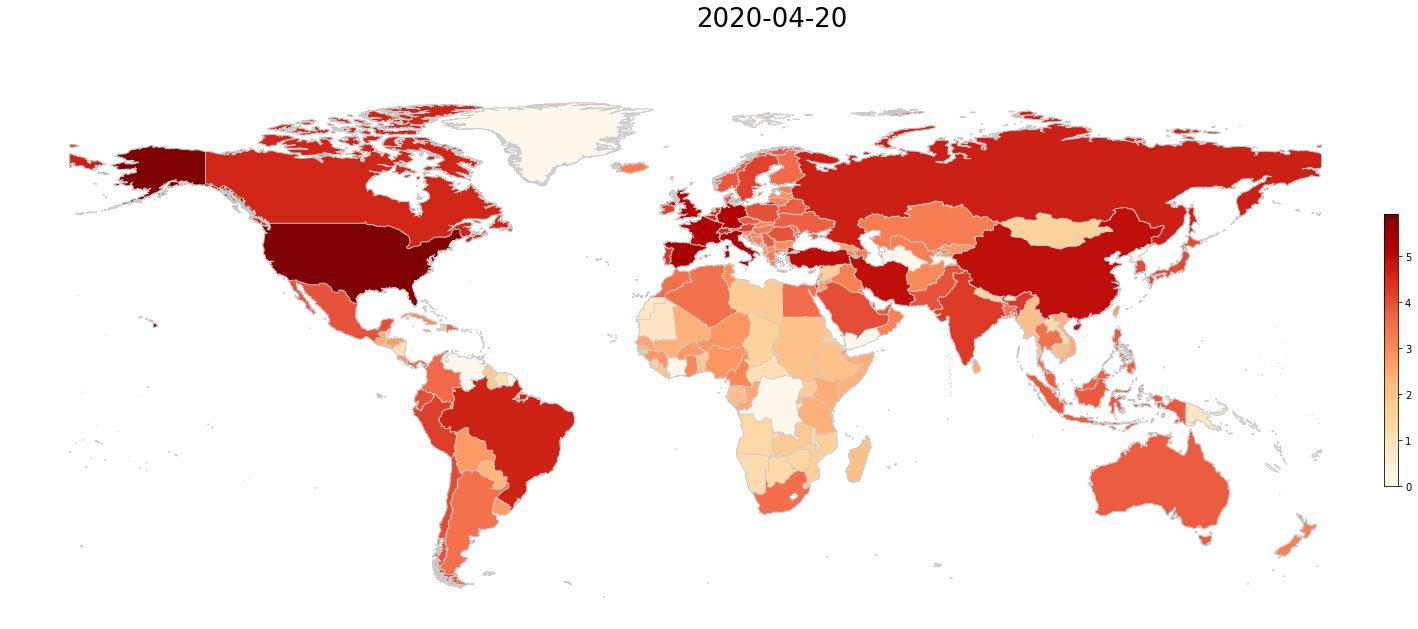

In [94]:
image_no = 0
fig, ax = plt.subplots(1, figsize=(30, 10))
variable = 'log_Confirmed'
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, pad = 0.0001, shrink=0.5)

vmin, vmax = 0, edited_gpd.log_Confirmed[edited_gpd.Date == '2020-04-21'].max()
for i in range(0, len(date_list_test)):   
    date_for_mask = date_list_test.Date.values[i]
    mask = (edited_gpd['Date'] == date_for_mask)
    my_map = edited_gpd.loc[mask]
    ax.axis('off')
    fig.suptitle(str(date_list_test.Date.values[i]), fontsize=26, fontweight = 3)
    my_map.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
    fig.savefig('output_images/image_{image_no:04d}.png'.format(image_no=image_no), 
                dpi=300, bbox_inches='tight')
    image_no +=1

In [81]:
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

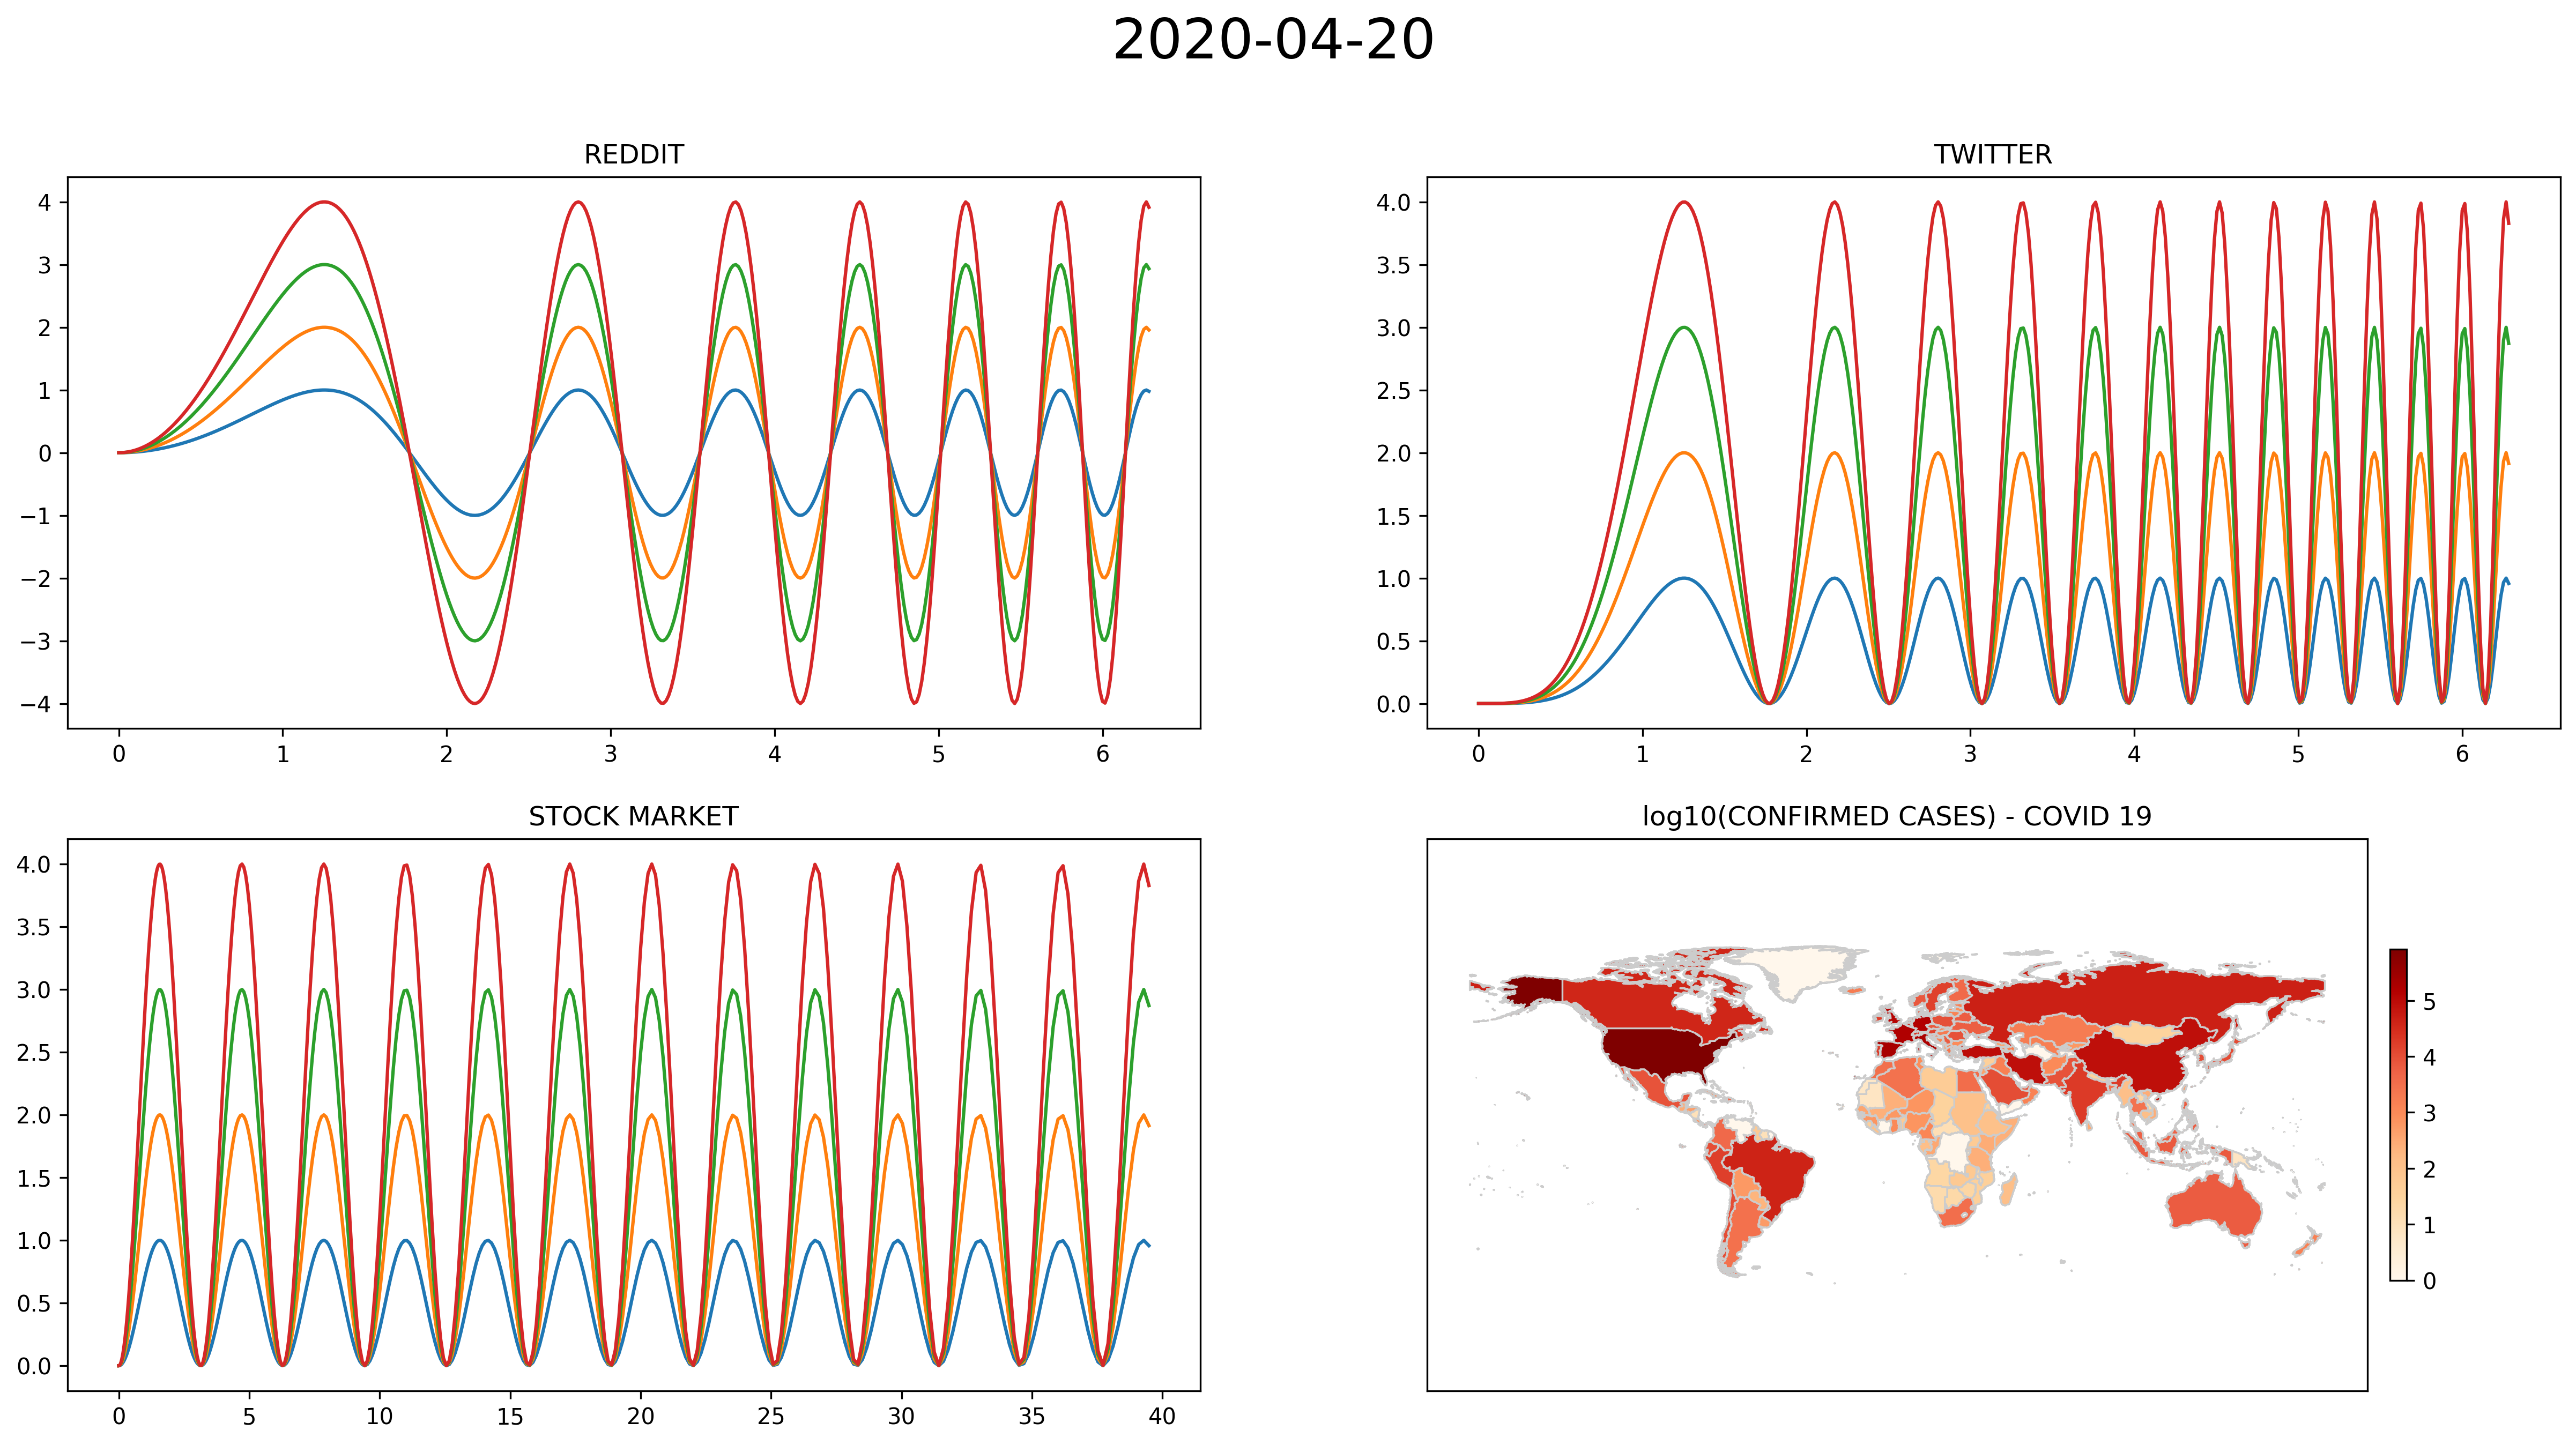

In [91]:
path = 'output_images/'
image_no = 0
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), dpi=300)
variable = 'log_Confirmed'
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, ax = ax4, orientation = 'vertical', shrink=0.6, pad=0.02)

ax1.set_title("REDDIT")
ax2.set_title("TWITTER")
ax3.set_title("STOCK MARKET")
ax4.set_title("log10(CONFIRMED CASES) - COVID 19")

vmin, vmax = 0, edited_gpd.log_Confirmed[edited_gpd.Date == '2020-04-21'].max()
for i in range(0, len(date_list_test)):   
    date_for_mask = date_list_test.Date.values[i]
    mask = (edited_gpd['Date'] == date_for_mask)
    my_map = edited_gpd.loc[mask]
    
    ax1.plot(x, y*(i+1))
    ax2.plot(x, (y**2)*(i+1))
    ax3.plot(x**2, (y**2)*(i+1))
    
    ax4.get_xaxis().set_visible(False)
    ax4.get_yaxis().set_visible(False)
    ax4.axis('equal')
    fig.suptitle(str(date_list_test.Date.values[i]), fontsize = 25, fontweight = 3)
    my_map.plot(column=variable, cmap='OrRd', 
                linewidth=0.8, ax=ax4, edgecolor='0.8', figsize=(30,20)
                )
    fig.savefig(os.path.join(path, 'image_{image_no:04d}.png'.format(image_no=image_no)), 
                dpi=300, bbox_inches='tight')
    image_no +=1

In [87]:
# Making a video out of all the images
images_path = "output_images/"
print(os.path.isdir(images_path))
os.system("ffmpeg -f image2 -r 1 -s 1024x768 -i output_images/image_%04d.png -vcodec mpeg4 -y output_images/video.mp4")

True


0

In [18]:
# does the same thing as above
images_path = "output_images/"
sp.call([
        'ffmpeg',
        '-y',
        '-r', '1',       #frame rate: 1/5 for 5 images in 1 sec, 5 for 1 image for 5 secs. 1 for 1 image for 1 sec
        '-f', 'image2',
        '-s', '1024x768',
        '-i', os.path.join(images_path, 'image_%04d.png'),
        '-vcodec', 'libx264',
        '-crf',  '25',
        '-pix_fmt', 'yuv420p',
        os.path.join(images_path, 'video.mp4'),
    ])

1